In [1]:
from cata2data import CataData

In [2]:
image_path = '/Users/ascaife/SRC/GITHUB/MIGHTEE-FR/data/MIGHTEE_Continuum_Early_Science_COSMOS_r-1p2.app.restored.circ.fits'
catlog_path = '/Users/ascaife/SRC/GITHUB/MIGHTEE-FR/catalogue/imogen_cat.txt'
imagesize=70

---
#### 1. NO transforms or pre-processing

In [3]:
# NO transforms or pre-processing:

mightee_data = CataData(
    catalogue_paths=[catlog_path],
    image_paths=[image_path],
    field_names=['COSMOS'],
    cutout_width=imagesize
#    cutout_shape=70
)

mightee_data.df.rename(mapper={"RA_host":"ra", "DEC_host":"dec"}, axis="columns", inplace=True)

In [4]:
print(len(mightee_data[0]))
mightee_data[0][0].shape

1


(70, 70)

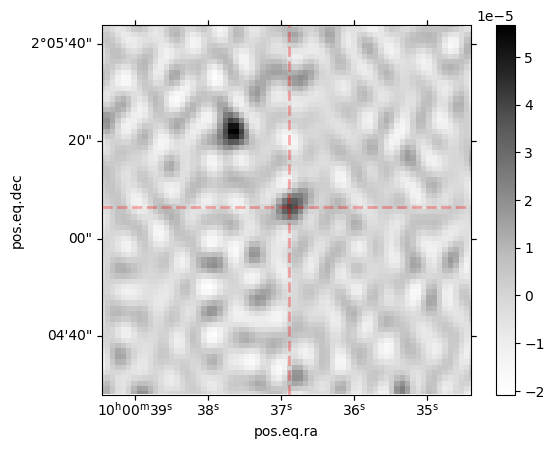

,Name,RA_radio,DEC_radio,ra,dec,S_INT14,Redshift,Redshift_err,Redshift_note,L14,...,VLBAAGN,AGN,SFG,probSFG,unclass,HERG,LERG,probLERG,RQAGN,field
60,J100036.89+020506.4,150.153,2.085,150.154,2.085,0.000059,1.433,0.554,photz,5.750000e+23,...,False,True,False,False,False,False,False,False,True,COSMOS


In [5]:
idx = 60
mightee_data.plot(idx)
mightee_data.df.iloc[idx : idx + 1]

In [6]:
import numpy as np

mu, sigma = np.mean(mightee_data[0][0]), np.std(mightee_data[0][0])

---
#### 2. transforms but NO pre-processing

In [7]:
# transforms but NO pre-processing:

import torchvision.transforms as T

transform = T.Compose(
    [
        T.ToTensor(),
        T.Normalize((0,), (1,)),
    ]
)

mightee_data = CataData(
    catalogue_paths=[catlog_path],
    image_paths=[image_path],
    field_names=['COSMOS'],
    cutout_width=imagesize,
    transform=transform
)

mightee_data.df.rename(mapper={"RA_host":"ra", "DEC_host":"dec"}, axis="columns", inplace=True)

In [8]:
mightee_data[0][0].shape

torch.Size([1, 70, 70])

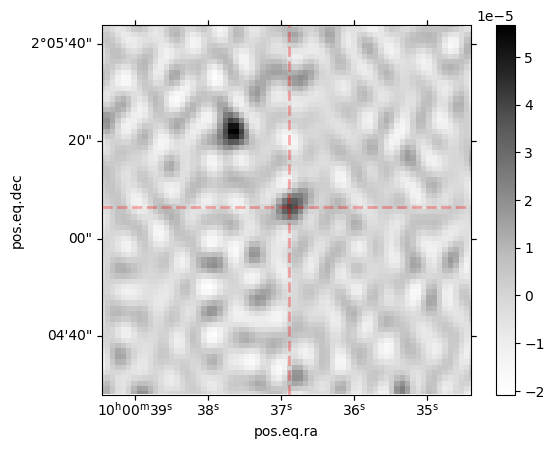

,Name,RA_radio,DEC_radio,ra,dec,S_INT14,Redshift,Redshift_err,Redshift_note,L14,...,VLBAAGN,AGN,SFG,probSFG,unclass,HERG,LERG,probLERG,RQAGN,field
60,J100036.89+020506.4,150.153,2.085,150.154,2.085,0.000059,1.433,0.554,photz,5.750000e+23,...,False,True,False,False,False,False,False,False,True,COSMOS


In [9]:
idx = 60
mightee_data.plot(idx)
mightee_data.df.iloc[idx : idx + 1]

---
#### 3. transforms AND pre-processing

In [10]:
# transforms AND pre-processing:

from mightee_preprocessing import image_preprocessing

transform = T.Compose(
    [
        T.ToTensor(),
        T.Normalize((0.,), (1.,)),
    ]
)

mightee_data = CataData(
    catalogue_paths=[catlog_path],
    image_paths=[image_path],
    field_names=['COSMOS'],
    cutout_width=imagesize,
    transform=transform,
    image_preprocessing=image_preprocessing
    
)

mightee_data.df.rename(mapper={"RA_host":"ra", "DEC_host":"dec"}, axis="columns", inplace=True)

In [11]:
mightee_data[0][0].shape

torch.Size([1, 70, 70])

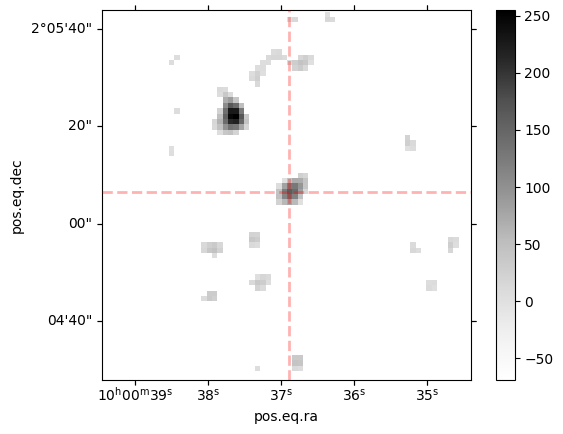

,Name,RA_radio,DEC_radio,ra,dec,S_INT14,Redshift,Redshift_err,Redshift_note,L14,...,VLBAAGN,AGN,SFG,probSFG,unclass,HERG,LERG,probLERG,RQAGN,field
60,J100036.89+020506.4,150.153,2.085,150.154,2.085,0.000059,1.433,0.554,photz,5.750000e+23,...,False,True,False,False,False,False,False,False,True,COSMOS


In [12]:
idx = 60
mightee_data.plot(idx)
mightee_data.df.iloc[idx : idx + 1]

---
#### 4. transforms, pre-processing AND labels

In [13]:
# transforms, pre-processing AND labels:

from mightee_preprocessing import image_preprocessing

transform = T.Compose(
    [
        T.ToTensor(),
        T.Normalize((0.,), (1.,)),
    ]
)

mightee_data = CataData(
    catalogue_paths=[catlog_path],
    image_paths=[image_path],
    field_names=['COSMOS'],
    cutout_width=imagesize,
    transform=transform,
    image_preprocessing=image_preprocessing,
    targets=['AGN']
    
)

mightee_data.df.rename(mapper={"RA_host":"ra", "DEC_host":"dec"}, axis="columns", inplace=True)

In [14]:
mightee_data[0][1]

['True']

In [ ]:
# Labels can be recovered via the pytorch dataloader 

#from torch.utils.data import DataLoader
#data_loader = DataLoader(mightee_data, batch_size=1, shuffle=False)
#x, y = next(iter(data_loader))

In [15]:
idx=60
x, y = mightee_data.__getitem__(index=idx)

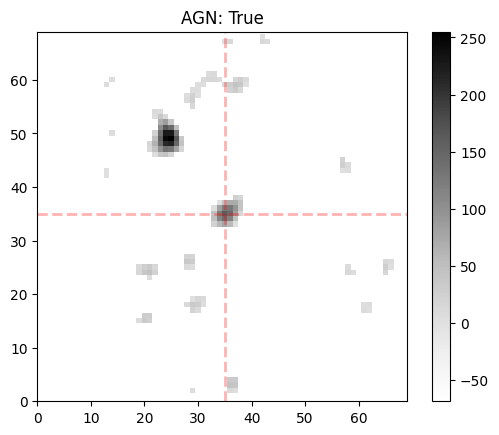

In [16]:
import pylab as pl

pl.subplot()
pl.imshow(np.squeeze(x), origin="lower", cmap="Greys")
pl.colorbar()
pl.plot(
        (imagesize // 2, imagesize // 2),
        (0, imagesize - 1),
        color="red",
        linewidth=2,
        ls="--",
        alpha=0.3,
    )
pl.plot(
        (0, imagesize - 1),
        (imagesize // 2, imagesize // 2),
        color="red",
        linewidth=2,
        ls="--",
        alpha=0.3,
    )
pl.xlim(0, imagesize - 1)
pl.ylim(0, imagesize - 1)
pl.title("AGN: {}".format(y[0]))
pl.show()

---
#### 5. transforms, pre-processing, labels AND wcs

In [17]:
# transforms, pre-processing, labels AND wcs:

from mightee_preprocessing import image_preprocessing

transform = T.Compose(
    [
        T.ToTensor(),
        T.Normalize((0.,), (1.,)),
    ]
)

mightee_data = CataData(
    catalogue_paths=[catlog_path],
    image_paths=[image_path],
    field_names=['COSMOS'],
    cutout_width=imagesize,
    transform=transform,
    image_preprocessing=image_preprocessing,
    targets=['AGN'],
    return_wcs=True
    
)

mightee_data.df.rename(mapper={"RA_host":"ra", "DEC_host":"dec"}, axis="columns", inplace=True)

In [18]:
# Note: we cannot use a dataloader to return the WCS because it is not in a recognised format.

idx = 60
img, label, wcs = mightee_data.__getitem__(index=idx)

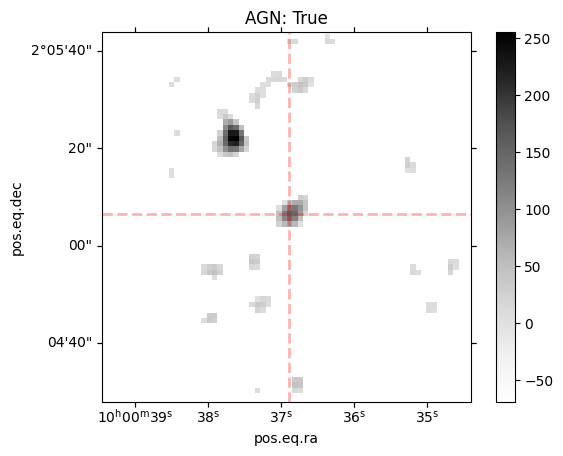

,Name,RA_radio,DEC_radio,ra,dec,S_INT14,Redshift,Redshift_err,Redshift_note,L14,...,VLBAAGN,AGN,SFG,probSFG,unclass,HERG,LERG,probLERG,RQAGN,field
60,J100036.89+020506.4,150.153,2.085,150.154,2.085,0.000059,1.433,0.554,photz,5.750000e+23,...,False,True,False,False,False,False,False,False,True,COSMOS


In [20]:
import pylab as pl

pl.subplot(projection=wcs[0])
pl.imshow(np.squeeze(img), origin="lower", cmap="Greys")
pl.colorbar()
pl.plot(
        (imagesize // 2, imagesize // 2),
        (0, imagesize - 1),
        color="red",
        linewidth=2,
        ls="--",
        alpha=0.3,
    )
pl.plot(
        (0, imagesize - 1),
        (imagesize // 2, imagesize // 2),
        color="red",
        linewidth=2,
        ls="--",
        alpha=0.3,
    )
pl.xlim(0, imagesize - 1)
pl.ylim(0, imagesize - 1)
pl.title("AGN: {}".format(y[0]))
pl.show()

mightee_data.df.iloc[idx : idx + 1]